# T2 - MC920
> Natan Beltrão da Cunha Pevidor Carvalho - 184972



## Configurações Iniciais

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import imageio
import pandas as pd

def threshold(threshold_title, threshold_function):
    imgs = ['baboon', 'fiducial', 'monarch', 'peppers', 'retina', 'sonnet', 'wedge']
    figure, axis = plt.subplots(len(imgs), 3, figsize=(16, 28))
    axis[0,0].set_title('Imagem Original')
    axis[0,1].set_title(threshold_title)
    axis[0,2].set_title('Histograma')
    
    table = []
    
    for i in range(len(imgs)):
        img = plt.imread(f'./images/in/{imgs[i]}.pgm')
        axis[i,0].imshow(img, cmap='gray', vmin=0, vmax=255)
        
        thresholded_img = threshold_function(img)
        axis[i,1].imshow(thresholded_img, cmap='gray', vmin=0, vmax=255)
        
        axis[i,2].hist(img.ravel(), bins=256, range=(0, 256))
        
        uniques, counts = np.unique(thresholded_img, return_counts=True)
        table.append([imgs[i], counts[0] * 100 / thresholded_img.size])
        
        directory = f'images/out/{threshold_title}'
        if not os.path.exists(directory):
            os.mkdir(directory)
        imageio.imsave(f'{directory}/{imgs[i]}.pgm', thresholded_img.astype(np.uint8))
    
    pd.options.display.float_format = '{0:.4f}%'.format
    display(pd.DataFrame(table, columns=['Imagem', 'Porcentagem']))
    plt.show()

## Limiarização Global

,Imagem,Porcentagem
0,baboon,46.1498%
1,fiducial,61.8529%
2,monarch,77.5472%
3,peppers,52.5788%
4,retina,84.2590%
5,sonnet,52.0588%
6,wedge,60.6961%


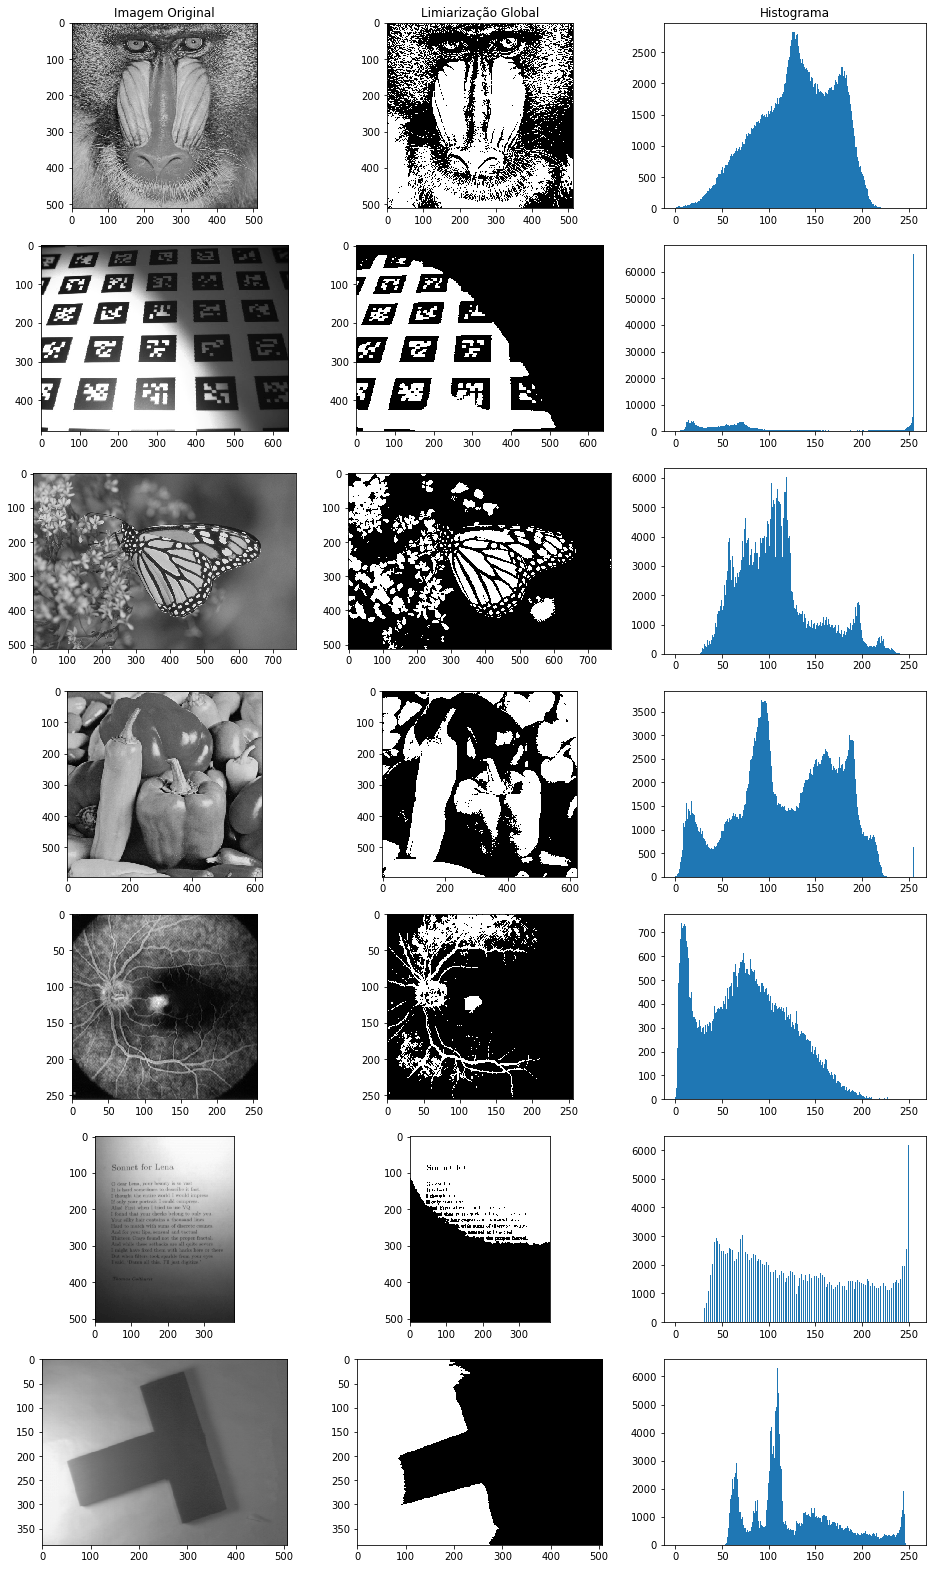

In [2]:
global_thresholding = lambda i: np.where(i < 128, 0, 255)

threshold('Limiarização Global', global_thresholding)